In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 5s 0us/step


In [5]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [6]:
x = Flatten()(vgg.output)
x = Dense(64, activation='relu')(x)
prediction = Dense(1, activation='sigmoid')(x)

In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [8]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [9]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/Edwisor/Edwisor Project/Dataset/cats_dog_dataset/train',  # This is the source directory for training images
        target_size=(224, 224), 
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/My Drive/Edwisor/Edwisor Project/Dataset/cats_dog_dataset/test',  # This is the source directory for training images
        target_size=(224, 224),  
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [13]:
r = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=5,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

Epoch 1/5
125/125 [==============================] - 1921s 15s/step - loss: 0.3566 - accuracy: 0.8562 - val_loss: 0.3477 - val_accuracy: 0.9250
Epoch 2/5
125/125 [==============================] - 46s 370ms/step - loss: 0.1415 - accuracy: 0.9448 - val_loss: 0.1364 - val_accuracy: 0.9275
Epoch 3/5
125/125 [==============================] - 46s 371ms/step - loss: 0.0755 - accuracy: 0.9795 - val_loss: 0.0611 - val_accuracy: 0.9292
Epoch 4/5
125/125 [==============================] - 47s 373ms/step - loss: 0.0426 - accuracy: 0.9937 - val_loss: 0.1772 - val_accuracy: 0.9208
Epoch 5/5
125/125 [==============================] - 47s 373ms/step - loss: 0.0301 - accuracy: 0.9952 - val_loss: 0.5002 - val_accuracy: 0.9233


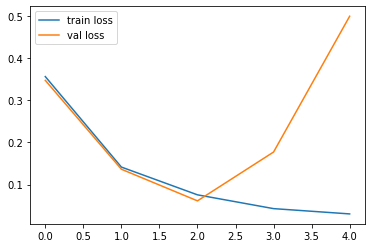

<Figure size 432x288 with 0 Axes>

In [14]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

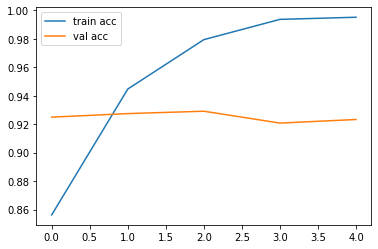

<Figure size 432x288 with 0 Axes>

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

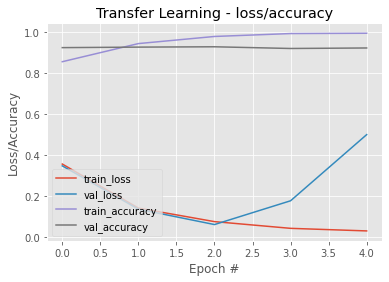

In [19]:
N = 5
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), r.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), r.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), r.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), r.history["val_accuracy"], label="val_accuracy")
plt.title("Transfer Learning - loss/accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")